In [2]:
from pandas import DataFrame, Series
import pandas as pd
import numpy as np

In [3]:
df = DataFrame(columns=[1,2,3,4,5,6])
accnum = Series([0]*69, index=range(1,70))
accred = Series([0]*26, index=range(1,27))

with open('list.dat', 'r') as f:
    for r in f:
        readlist = r.strip().split()
        datestr = ' '.join(readlist[0:3])
        nlist = list(map(int,readlist[3:]))
        for v in nlist[:5]:
            accnum[v] += 1
        accred[nlist[5]] += 1         
        df.loc[datestr] = nlist
        

print (df)

               1   2   3   4   5   6
Jan 19, 2019   5   8  41  65  66  20
Jan 16, 2019  14  29  31  56  61   1
Jan 12, 2019   7  36  48  57  58  24
Jan 9, 2019    6  19  37  49  59  22
Jan 5, 2019    3   7  15  27  69  19
Jan 2, 2019    8  12  42  46  56  12
Dec 29, 2018  12  42  51  53  62  25
Dec 26, 2018   5  25  38  52  67  24
Dec 22, 2018  21  28  30  40  59  26
Dec 19, 2018  15  29  31  37  43  16
Dec 15, 2018   8  38  43  52  55  17
Dec 12, 2018   4   9  21  29  64  26
Dec 8, 2018   14  32  34  46  61  10
Dec 5, 2018    9  11  36  37  38  11
Dec 1, 2018   10  11  47  55  58  26
Nov 28, 2018   4  19  59  68  69  21
Nov 24, 2018  11  33  51  56  58  18
Nov 21, 2018   7  14  23  38  55  18
Nov 17, 2018   6   8  20  52  68   5
Nov 14, 2018   7  42  49  62  69  23
Nov 10, 2018   5  29  34  53  57  24
Nov 7, 2018   26  28  34  42  50  25
Nov 3, 2018   15  21  24  32  65  11
Oct 31, 2018   7  25  39  40  47  20
Oct 27, 2018   8  12  13  19  27   4
Oct 24, 2018   3  21  45  53  56  22
O

In [6]:
accnum = accnum.sort_values(ascending=False)

In [4]:
accred = accred.sort_values(ascending=False)

# Numbers Frequencies from 2018 to now

In [1]:
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

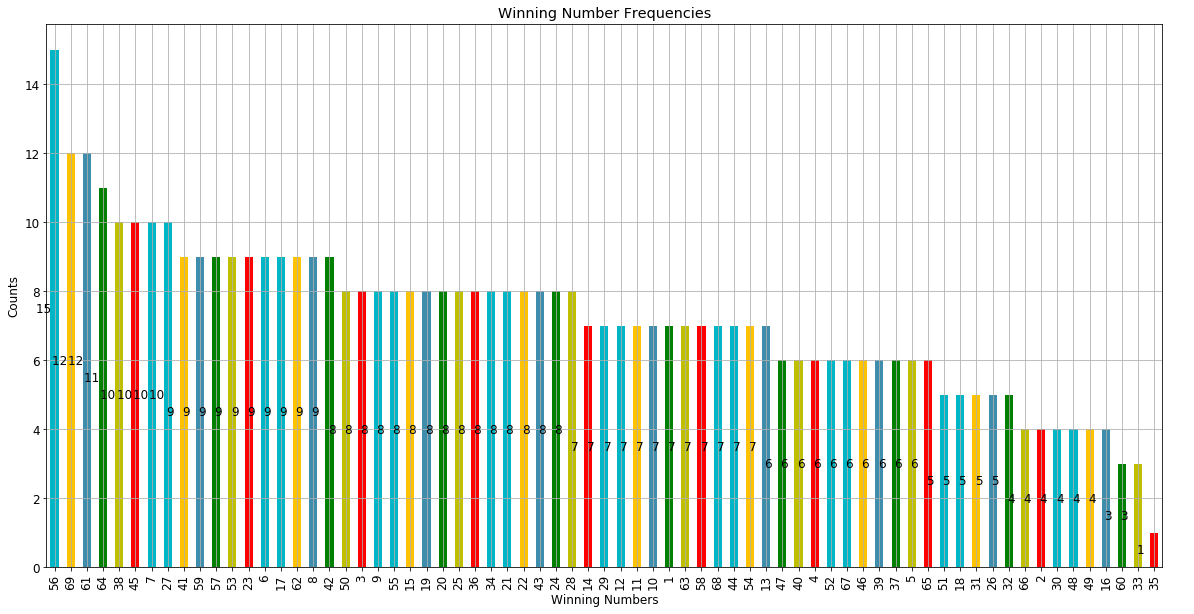

In [29]:
fig = plt.figure()
my_colors = ['#00B5C5','#FEC200','#3E8DAC', 'g', 'y','r']
ax = accnum.plot.bar(stacked=False, figsize=(20,10), grid=True, color=my_colors)

plt.rcParams['font.size'] = 12
plt.title('Winning Number Frequencies')

ax.set_xlabel('Winning Numbers')
ax.set_ylabel('Counts')


labels = []

for i in accnum.index:
        value_str = u"{:<12,}".format(int(accnum.loc[i])) 
        labels.append(value_str)

#print labels

patches = ax.patches
for label, rect in zip(labels, patches):
    width = rect.get_width()
    if width > 0:
        x = rect.get_x()
        y = rect.get_y()
        height = rect.get_height()
#        csv = "{:<12,}".format(int(label))
        ax.text(x + width/2+0.5, y + height/2.-0.01, label, ha='center', va='center', fontsize=12)

fig  = ax.get_figure()
fig.savefig('PNG/WinningNum.png')
plt.show()

In [47]:
accnum[:31]
for i in accnum[accnum>8].index:
    print ('{:2}'.format(i), end=' ')
print (' ')
for i in accnum[accnum>8]:
    print ('{:2}'.format(i), end=' ')

56 69 61 64 38 45  7 27 41 59 57 53 23  6 17 62  8 42  
15 12 12 11 10 10 10 10  9  9  9  9  9  9  9  9  9  9 

In [49]:

for i in accnum[accnum<=8].index:
    print ('{:2}'.format(i), end=' ')
print (' ')
for i in accnum[accnum<=8]:
    print ('{:2}'.format(i), end=' ')

50  3  9 55 15 19 20 25 36 34 21 22 43 24 28 14 29 12 11 10  1 63 58 68 44 54 13 47 40  4 52 67 46 39 37  5 65 51 18 31 26 32 66  2 30 48 49 16 60 33 35  
 8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  7  7  7  7  7  7  7  7  7  7  7  7  6  6  6  6  6  6  6  6  6  6  5  5  5  5  5  4  4  4  4  4  4  3  3  1 

In [76]:
recomlist1 = accnum[(accnum>8) & (accnum<11)]
recomlist2 = accnum[accnum<7]
reclist = recomlist1.append(recomlist2)
for i in reclist.index:
    print ('{:2}'.format(i), end=' ')
print (' ')
for i in reclist:
    print ('{:2}'.format(i), end=' ')

38 45  7 27 41 59 57 53 23  6 17 62  8 42 47 40  4 52 67 46 39 37  5 65 51 18 31 26 32 66  2 30 48 49 16 60 33 35  
10 10 10 10  9  9  9  9  9  9  9  9  9  9  6  6  6  6  6  6  6  6  6  6  5  5  5  5  5  4  4  4  4  4  4  3  3  1 

In [78]:
import random
recval = list(reclist.index)
for i in range(5):
    print (random.sample(recval, 5))

[23, 42, 60, 18, 33]
[30, 32, 59, 41, 49]
[51, 2, 18, 47, 42]
[42, 38, 7, 40, 30]
[2, 6, 46, 53, 7]


In [79]:
print ('total Number of recommed list {:2}'.format(len(recval)))

total Number of recommed list 38


# Red Number Frequencies 

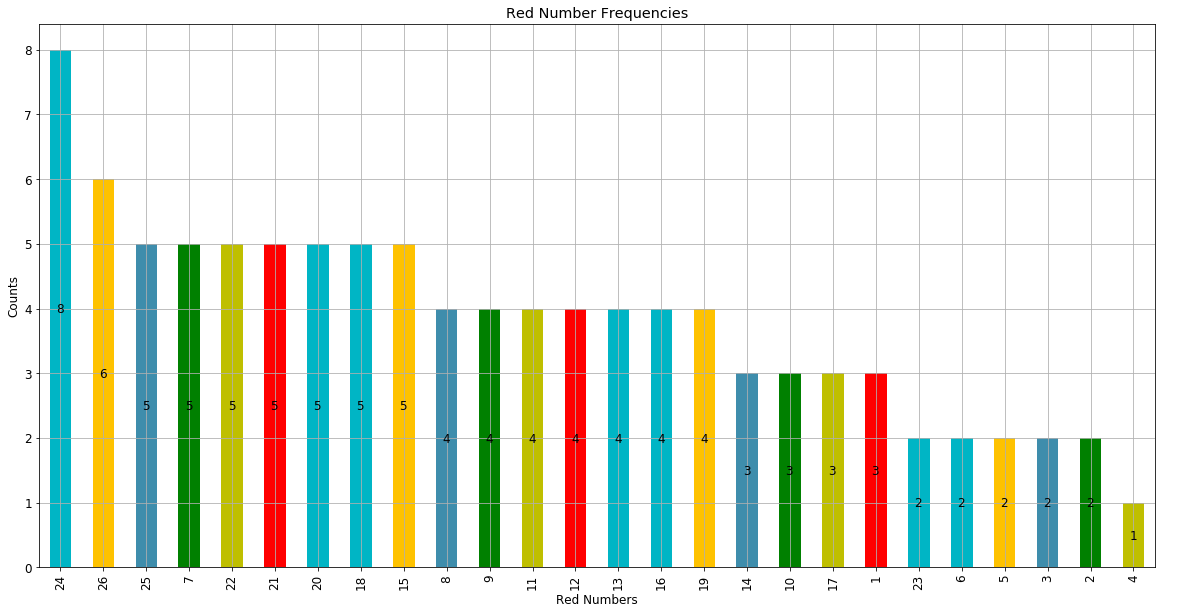

In [24]:
fig = plt.figure()
my_colors = ['#00B5C5','#FEC200','#3E8DAC', 'g', 'y','r']
ax = accred.plot.bar(stacked=False, figsize=(20,10), grid=True, color=my_colors)

plt.rcParams['font.size'] = 12
plt.title('Red Number Frequencies')

ax.set_xlabel('Red Numbers')
ax.set_ylabel('Counts')


labels = []

for i in accred.index:
        value_str = u"{:<12,}".format(int(accred.loc[i])) 
        labels.append(value_str)

#print labels

patches = ax.patches
for label, rect in zip(labels, patches):
    width = rect.get_width()
    if width > 0:
        x = rect.get_x()
        y = rect.get_y()
        height = rect.get_height()
#        csv = "{:<12,}".format(int(label))
        ax.text(x + width/2+0.5, y + height/2.-0.01, label, ha='center', va='center', fontsize=12)

fig  = ax.get_figure()
fig.savefig('PNG/RedNum.png')
plt.show()

In [51]:

for i in accred[accred>=5].index:
    print ('{:2}'.format(i), end=' ')
print (' ')
for i in accred[accred>=5]:
    print ('{:2}'.format(i), end=' ')

24 26 25  7 22 21 20 18 15  
 8  6  5  5  5  5  5  5  5 

In [52]:

for i in accred[accred<5].index:
    print ('{:2}'.format(i), end=' ')
print (' ')
for i in accred[accred<5]:
    print ('{:2}'.format(i), end=' ')

 8  9 11 12 13 16 19 14 10 17  1 23  6  5  3  2  4  
 4  4  4  4  4  4  4  3  3  3  3  2  2  2  2  2  1 